# Wave propagation in piles
© 2022 Exneyder A. Montoya-Araque, Daniel F. Ruiz and Universidad EAFIT.

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/eamontoyaa/EAFIT_soil_dynamics/blob/main/wave_propagation.ipynb).

The content of this notebook was developed based on [A. Verruijt (2010)](https://doi.org/10.1007/978-90-481-3441-0).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact, widgets

plt.style.use("default")
mpl.rcParams.update(
    {
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "serif",  # Use the Computer modern font
        "font.serif": "cmr10",
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False
    }
)

## Unconfined pile

Consider a pile of constant cross sectional area $A$, consisting of a linear elastic material. If there is no friction along the shaft of the pile (i.e. unconfined pile) the wave equation is:

$$
\frac{\partial^2 u}{\partial t^2} = c\frac{\partial^2 u}{\partial x^2}
$$

Where $c$ is the wave propagation velocity
$$
c = \sqrt{\frac{E}{\rho}}
$$
$E$ is the modulus of elasticity  and $\rho$ is the pile density.

### Finite pile subjected to periodic loading

Consider a pile of finite length $h$ subjected to a periodic load at one end, and rigidly supported at its other end. The boudary conditions are:
$$
x = 0 \vert_{z = 0}
$$
$$
\sigma = -p_0 \sin(\omega t) \vert_{z = h}
$$
The analitic solution of the wave equation is given by the following equation:
$$
u(x, t) = -  \frac{p_0 c \sin\left(\frac{w z}{c} \right)}{E\omega \cos\left(\frac{w h}{c} \right)} \sin\left(\omega c \right)
$$

The following script plots the displacements, $u$ at different positions of the pile, $x$, generated by the wave propagation due to the periodic load. The interactive widgets can be used to modify the parameters.

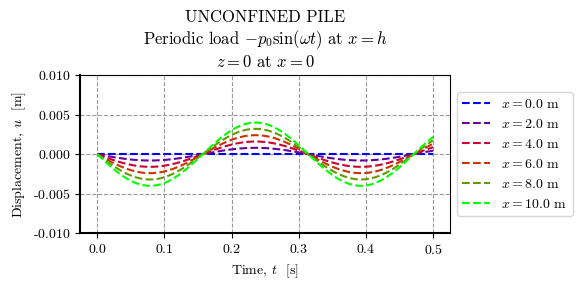

In [3]:
def unconfined_finite_pile(h=10, elastic_mod=25000, rho=2450, omega=20, p_0=10000):
    """
    h: pile length [m]
    elastic_mod: elasticity modulus [MPa]
    rho: pile density [kg/m3]
    omega: frequency of periodic load [rad/s]
    p_0: amplitude of periodic load [kN/m2]
    """
    n = 5
    # Unit conversions
    elastic_mod = elastic_mod * 1e6  # Pa
    p_0 = p_0 * 1e3  # N/m2
    # Plot
    c = np.sqrt(elastic_mod / rho)  # wave velocity, m/s
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=[6, 3])
    ax.set_prop_cycle("color", plt.cm.brg(np.linspace(0, 1, n + 1)))
    t = np.linspace(0, 0.5, 100)
    for x in np.linspace(0, h, n + 1):
        u = (-p_0 * c * np.sin(omega * x / c) * np.sin(omega * t)) / (
            elastic_mod * omega * np.cos(omega * h / c)
        )
        ax.plot(t, u, ls="--", label="$x=$" + f"{x:.1f} m")
    ax.set_title("UNCONFINED PILE\n"
        + "Periodic load $-p_0 \sin(\omega t)$ at $x=h$\n"
        + "$z=0$ at $x=0$")
    ax.set(xlabel="Time, $t$  [s]", ylabel="Displacement, $u$  [m]", ylim=(-0.01, 0.01))
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.grid(True, which="major", color="#999999", linestyle="--")
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    fig.tight_layout()

unconfined_finite_pile(h=10, elastic_mod=25000, rho=2450, omega=20, p_0=10000)

In [4]:
style = {'description_width': '100px'}
interact(  # Interactive widgets
    unconfined_finite_pile,
    h=widgets.FloatSlider(value=10, min=0, max=50, description="h [m]", style=style),
    elastic_mod=widgets.FloatText(value=25000, description="E [MPa]", style=style),
    rho=widgets.FloatText(value=2450, description="ρ [kg/m3]", style=style),
    omega=widgets.FloatSlider(value=20, min=0, max=100, description="ω [rad/s]", style=style),
    p_0=widgets.FloatSlider(value=10000, min=0, max=50000, description="P_0 [kPa]", style=style)
)

interactive(children=(FloatSlider(value=10.0, description='h [m]', max=50.0, style=SliderStyle(description_wid…

<function __main__.unconfined_finite_pile(h=10, elastic_mod=25000, rho=2450, omega=20, p_0=10000)>

The following script generated an animation of the displacements, $u$, at different positions of the pile, $x$, generated by the wave propagation due to the periodic load. The interactive widgets can be used to modify the parameters.

In [5]:
def unconfined_finite_pile_2(elapsed_t, h=10, elastic_mod=25000, rho=2450, omega=20, p_0=10000):
    """
    elapsed_t: time for the animation [s]
    h: pile length [m]
    elastic_mod: elasticity modulus [MPa]
    rho: pile density [kg/m3]
    omega: frequency of periodic load [rad/s]
    p_0: amplitude of periodic load [kN/m2]
    """
    n = 5
    # Unit conversions
    elastic_mod = elastic_mod * 1e6  # Pa
    p_0 = p_0 * 1e3  # N/m2
    elapsed_t *= 1e-4    
    # Plot
    c = np.sqrt(elastic_mod / rho)  # wave velocity, m/s
    fig, axs = plt.subplots(ncols=1, nrows=2, figsize=[5, 5])
    axs[0].set_prop_cycle("color", plt.cm.brg(np.linspace(0, 1, n + 1)))
    t = np.linspace(0, elapsed_t, 100)
    for x in np.linspace(0, h, n + 1):
        u = (-p_0 * c * np.sin(omega * x / c) * np.sin(omega * t)) / (
            elastic_mod * omega * np.cos(omega * h / c)
        )
        axs[0].plot(t, u, ls=":", label="$x=$" + f"{x:.1f} m")
        axs[1].plot((0, u[-1]), (x, x), ls="-", color="b")
        axs[1].text(1.1, 0.5, s="$t=$"+f"{elapsed_t:.4f} s", transform=axs[1].transAxes)
    axs[0].legend(loc="center left", bbox_to_anchor=(1, 0.5))
    axs[0].set(xlabel="Time, $t$  [s]", ylabel="Displacement, $u$  [m]", xlim=(0, 0.5), ylim=(-0.01, 0.01))
    axs[1].set(xlabel="Displacement, $u$  [m]", ylabel="Position, $x$  [m]", xlim=(-0.01, 0.01))
    axs[1].invert_yaxis()
    for ax in axs:
        ax.spines["bottom"].set_linewidth(1.5)
        ax.spines["left"].set_linewidth(1.5)
        ax.grid(True, which="major", color="#999999", linestyle="--")
    fig.suptitle("UNCONFINED PILE\n"
        + "Periodic load $-p_0 \sin(\omega t)$ at $x=h$\n"
        + "$z=0$ at $x=0$")
    fig.tight_layout()

style = {'description_width': '100px'}
interact(  # Interactive widgets
    unconfined_finite_pile_2,
    elapsed_t=widgets.Play(value=0, min=0, max=5000, step=75, interval=750, description="play"),
    h=widgets.FloatSlider(value=10, min=0, max=50, description="h [m]", style=style),
    elastic_mod=widgets.FloatText(value=25000, description="E [MPa]", style=style),
    rho=widgets.FloatText(value=2450, description="ρ [kg/m3]", style=style),
    omega=widgets.FloatSlider(value=20, min=0, max=100, description="ω [rad/s]", style=style),
    p_0=widgets.FloatSlider(value=10000, min=0, max=50000, description="P_0 [kPa]", style=style)
)

interactive(children=(Play(value=0, description='play', interval=750, max=5000, step=75), FloatSlider(value=10…

<function __main__.unconfined_finite_pile_2(elapsed_t, h=10, elastic_mod=25000, rho=2450, omega=20, p_0=10000)>

## Confined pile

In soil mechanics piles in the ground usually experience friction along the pile shaft. Consider now a pile of constant cross sectional area $A$, consisting of a linear elastic material standing on a rigid base, and support. The wave equation is:

$$
\rho A \frac{\partial^2 u}{\partial t^2} = E A \frac{\partial^2 u}{\partial x^2} - C\tau
$$

Where $E$ is the modulus of elasticity, $\rho$ is the pile density $c$ is the wave propagation velocity
$$
c = \sqrt{\frac{E}{\rho}}
$$

$\tau$ is the shear stress assumed to be linearly proportional to the vertical displacement of the pile
$$
\tau = k u
$$
where $k$ is a constant that has the character of a subgrade modulus.

The wave equation can now be written as:
$$
\frac{1}{c^2} \frac{\partial^2 u}{\partial t^2} = \frac{\partial^2 u}{\partial x^2} - \frac{u}{H^2}
$$
Where $H$ is a length parameter characterizing the ratio of the axial pile stiffness to the friction constant.
$$
H^2 = \frac{E A}{k C}
$$

### Finite pile subjected to periodic loading

Consider a pile of finite length $h$ subjected to a periodic load at at the top of the pile, with no displacement allowed at the base of the pile. The boudary conditions are:
$$
u(x, t) = \frac{p_0 H}{EA\alpha} \frac{\sinh\left(\alpha\frac{h-x}{H} \right)}{\cosh\left(\alpha\frac{h}{H} \right)} \sin\left(\omega t \right)
$$
where
$$
\alpha = \sqrt{1 - \frac{\omega^2 H^2}{c^2}}
$$

The following script plots the displacements, $u$ at different positions of the pile, $x$, generated by the wave propagation due to the periodic load. The interactive widgets can be used to modify the parameters.

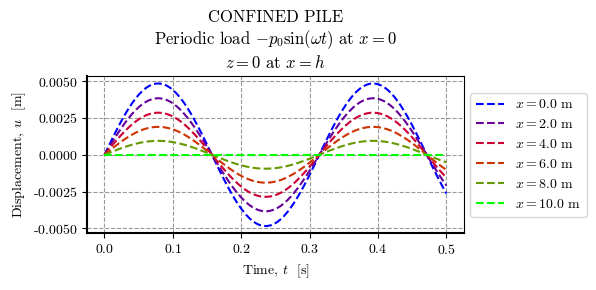

In [9]:
def confined_finite_pile(
    d=1, h=10, subgrade_mod=10, elastic_mod=25000, rho=2450, omega=20, p_0=10000
):
    """
    d: pile diameter [m]
    h: pile length [m]
    subgrade_mod: elasticity modulus [MPa/m]
    elastic_mod: elasticity modulus [MPa]
    rho: pile density [kg/m3]
    omega: frequency of periodic load [rad/s]
    p_0: amplitude of periodic load [kN/m2]
    """
    n = 5
    # Unit conversions
    elastic_mod = elastic_mod * 1e6  # Pa
    subgrade_mod = subgrade_mod * 1e6  # Pa
    p_0 = p_0 * 1e3  # N/m2
    # Plot
    area = np.pi * (0.5 * d)**2
    circ = 2 * np.pi * (0.5 * d)
    len_H = np.sqrt(elastic_mod * area / (subgrade_mod * circ))
    c = np.sqrt(elastic_mod / rho)  # wave velocity, m/s
    alpha = np.sqrt(1 - (omega * len_H / c)**2)
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=[6, 3])
    ax.set_prop_cycle("color", plt.cm.brg(np.linspace(0, 1, n + 1)))
    t = np.linspace(0, 0.5, 100)
    for x in np.linspace(0, h, n + 1):
        u = (p_0 * len_H * np.sinh(alpha * (h-x)/len_H) * np.sin(omega * t)) / (
            elastic_mod * area * alpha * np.cosh(alpha * h / len_H)
        )
        ax.plot(t, u, ls="--", label="$x=$" + f"{x:.1f} m")
    ax.set_title("CONFINED PILE\n"
        + "Periodic load $-p_0 \sin(\omega t)$ at $x=0$\n"
        + "$z=0$ at $x=h$")
    ax.set(xlabel="Time, $t$  [s]", ylabel="Displacement, $u$  [m]")
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.grid(True, which="major", color="#999999", linestyle="--")
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    fig.tight_layout()

confined_finite_pile(d=1, h=10, subgrade_mod=10, elastic_mod=25000, rho=2450, omega=20, p_0=10000)

In [7]:
style = {'description_width': '100px'}
interact(  # Interactive widgets
    confined_finite_pile,
    d=widgets.FloatSlider(value=1, min=0, max=5, description="Ø [m]", style=style),
    h=widgets.FloatSlider(value=10, min=0, max=50, description="h [m]", style=style),
    subgrade_mod=widgets.FloatText(value=10, description="k [MPa/m]", style=style),
    elastic_mod=widgets.FloatText(value=25000, description="E [MPa]", style=style),
    rho=widgets.FloatText(value=2450, description="ρ [kg/m3]", style=style),
    omega=widgets.FloatSlider(value=20, min=0, max=100, description="ω [rad/s]", style=style),
    p_0=widgets.FloatSlider(value=10000, min=0, max=50000, description="P_0 [kPa]", style=style)
)

interactive(children=(FloatSlider(value=1.0, description='Ø [m]', max=5.0, style=SliderStyle(description_width…

<function __main__.confined_finite_pile(d=1, h=10, subgrade_mod=10, elastic_mod=25000, rho=2450, omega=20, p_0=10000)>

The following script generated an animation of the displacements, $u$, at different positions of the pile, $x$, generated by the wave propagation due to the periodic load. The interactive widgets can be used to modify the parameters.

In [8]:
def confined_finite_pile_2(elapsed_t, d=1, h=10, subgrade_mod=10, elastic_mod=25000, rho=2450, omega=20, p_0=10000):
    """
    elapsed_t: time for the animation [s]
    d: pile diameter [m]
    h: pile length [m]
    subgrade_mod: elasticity modulus [MPa/m]
    elastic_mod: elasticity modulus [MPa]
    rho: pile density [kg/m3]
    omega: frequency of periodic load [rad/s]
    p_0: amplitude of periodic load [kN/m2]
    """
    n = 5
    # Unit conversions
    elastic_mod = elastic_mod * 1e6  # Pa
    subgrade_mod = subgrade_mod * 1e6  # Pa
    p_0 = p_0 * 1e3  # N/m2
    elapsed_t *= 1e-4
    # Plot
    area = np.pi * (0.5 * d)**2
    circ = 2 * np.pi * (0.5 * d)
    len_H = np.sqrt(elastic_mod * area / (subgrade_mod * circ))
    c = np.sqrt(elastic_mod / rho)  # wave velocity, m/s
    alpha = np.sqrt(1 - (omega * len_H / c)**2)
    fig, axs = plt.subplots(ncols=1, nrows=2, figsize=[5, 5])
    axs[0].set_prop_cycle("color", plt.cm.brg(np.linspace(0, 1, n + 1)))
    t = np.linspace(0, elapsed_t, 50)
    for x in np.linspace(0, h, n + 1):
        u = (p_0 * len_H * np.sinh(alpha * (h-x)/len_H) * np.sin(omega * t)) / (
            elastic_mod * area * alpha * np.cosh(alpha * h / len_H)
        )
        axs[0].plot(t, u, ls=":", label="$x=$" + f"{x:.1f} m")
        axs[1].plot((0, u[-1]), (x, x), ls="-", color="b")
        axs[1].text(1.1, 0.5, s="$t=$"+f"{elapsed_t:.4f} s", transform=axs[1].transAxes)
    axs[0].legend(loc="center left", bbox_to_anchor=(1, 0.5))
    axs[0].set(xlabel="Time, $t$  [s]", ylabel="Displacement, $u$  [m]", xlim=(0, 0.5), ylim=(-0.01, 0.01))
    axs[1].set(xlabel="Displacement, $u$  [m]", ylabel="Position, $x$  [m]", xlim=(-0.01, 0.01))
    axs[1].invert_yaxis()
    for ax in axs:
        ax.spines["bottom"].set_linewidth(1.5)
        ax.spines["left"].set_linewidth(1.5)
        ax.grid(True, which="major", color="#999999", linestyle="--")
    fig.suptitle("CONFINED PILE\n"
        + "Periodic load $-p_0 \sin(\omega t)$ at $x=0$\n"
        + "$z=0$ at $x=h$")
    fig.tight_layout()

style = {'description_width': '100px'}
interact(  # Interactive widgets
    confined_finite_pile_2,
    elapsed_t=widgets.Play(value=0, min=0, max=5000, step=75, interval=750, description="play"),
    d=widgets.FloatSlider(value=1, min=0, max=5, description="Ø [m]", style=style),
    h=widgets.FloatSlider(value=10, min=0, max=50, description="h [m]", style=style),
    subgrade_mod=widgets.FloatText(value=10, description="k [MPa]", style=style),
    elastic_mod=widgets.FloatText(value=25000, description="E [MPa]", style=style),
    rho=widgets.FloatText(value=2450, description="ρ [kg/m3]", style=style),
    omega=widgets.FloatSlider(value=20, min=0, max=100, description="ω [rad/s]", style=style),
    p_0=widgets.FloatSlider(value=10000, min=0, max=50000, description="P_0 [kPa]", style=style)
)

interactive(children=(Play(value=0, description='play', interval=750, max=5000, step=75), FloatSlider(value=1.…

<function __main__.confined_finite_pile_2(elapsed_t, d=1, h=10, subgrade_mod=10, elastic_mod=25000, rho=2450, omega=20, p_0=10000)>